In [99]:
import os
import numpy as np
import numpy.random as rnd
import scipy.stats as sts
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from sklearn.manifold import SpectralEmbedding
from scipy.stats import multivariate_normal, entropy
from sklearn.neighbors import KernelDensity

from scipy.spatial import procrustes

import fonctions_utiles as f

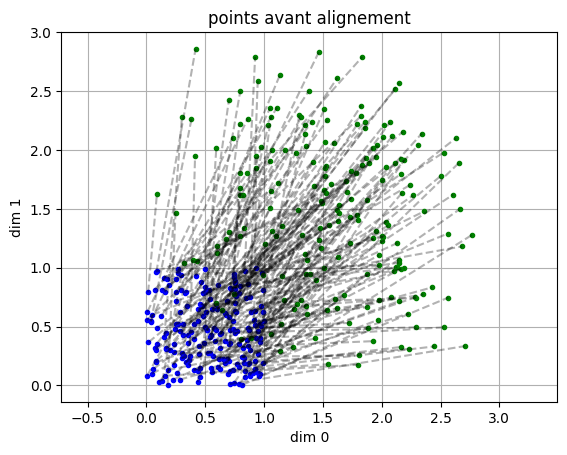

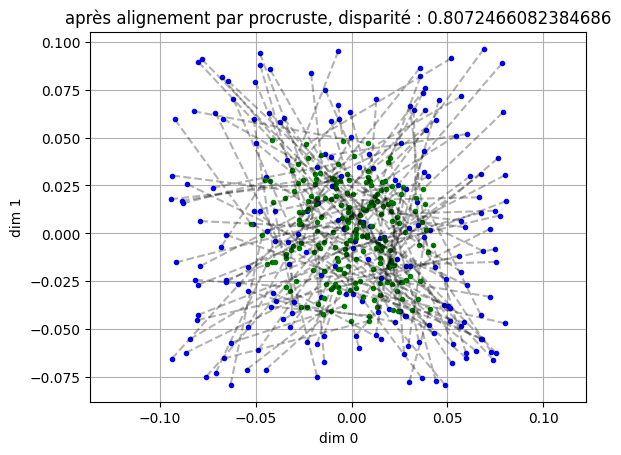

In [3]:
# Paramètres
N = 200
kNN = 5
dim = 1

# Générer des points aléatoires
x = np.random.rand(N, 2)
y = np.random.rand(N, 2) *2+x 

Kx = f.mat_aff(x)
Ky = f.mat_aff(y)

x_tr, y_tr, disp = procrustes(x, y)

Kx_tr = f.mat_aff(x_tr)
Ky_tr = f.mat_aff(y_tr)


# Affichage des points
plt.figure()
f.plot_pts_reliés(x, y, title='points avant alignement')

plt.figure()
f.plot_pts_reliés(x_tr, y_tr, title= f'après alignement par procruste, disparité : {disp}')
plt.show()



In [100]:


def generate_gaussian_points(mean, cov, num_points, dim):
    """
    Génère des points suivant une distribution gaussienne multivariée.
    """
    return np.random.multivariate_normal(mean, cov, size=num_points)

def kullback_leibler_analytical(mean1, cov1, mean2, cov2):
    """
    Calcule analytiquement la divergence KL entre deux gaussiennes multivariées.
    """
    cov1_inv = np.linalg.inv(cov1)
    cov2_inv = np.linalg.inv(cov2)
    term1 = np.trace(np.dot(cov2_inv, cov1))
    term2 = np.dot(np.dot((mean2 - mean1).T, cov2_inv), (mean2 - mean1))
    term3 = np.log(np.linalg.det(cov2) / np.linalg.det(cov1))
    return 0.5 * (term1 + term2 - mean1.shape[0] + term3)

def kullback_leibler_monte_carlo(points, mean2, cov2):
    """
    Estime la divergence KL par Monte Carlo.
    """
    q = multivariate_normal.pdf(points, mean=mean2, cov=cov2)
    p = multivariate_normal.pdf(points, mean=np.mean(points, axis=0), cov=np.cov(points.T))
    return np.mean(np.log(p / q))

def kullback_leibler_kde(points1, points2, bandwidth=1.0):
    """
    Estime la divergence KL en utilisant KDE (Kernel Density Estimation).
    """
    kde1 = KernelDensity(kernel="gaussian", bandwidth=bandwidth).fit(points1)
    kde2 = KernelDensity(kernel="gaussian", bandwidth=bandwidth).fit(points2)
    log_p1 = kde1.score_samples(points1)
    log_p2 = kde2.score_samples(points1)
    return np.mean(log_p1 - log_p2)

# Paramètres
num_points1, num_points2 = 500, 500
mean1, cov1 = [0, 0], [[1, 0.5], [0.5, 1]]
mean2, cov2 = [2, 2], [[1, -0.2], [-0.2, 1]]

# Génération des points
points1 = generate_gaussian_points(mean1, cov1, num_points1, len(mean1))
points2 = generate_gaussian_points(mean2, cov2, num_points2, len(mean2))

# Calcul analytique
kl_analytical = kullback_leibler_analytical(np.array(mean1), np.array(cov1), np.array(mean2), np.array(cov2))
print("Divergence KL analytique :", kl_analytical)

# Monte Carlo
kl_monte_carlo = kullback_leibler_monte_carlo(points1, mean2, cov2)
print("Divergence KL (Monte Carlo) :", kl_monte_carlo)

# KDE
kl_kde = kullback_leibler_kde(points1, points2)
print("Divergence KL (KDE) :", kl_kde)


Divergence KL analytique : 5.269263372299097
Divergence KL (Monte Carlo) : 5.257926069430252
Divergence KL (KDE) : 2.262890610374149


Divergence KL analytique : 0.34657359027997264
Divergence KL (Monte Carlo) : 0.30666871935600354
Divergence KL (KDE) : 0.2753562301946929


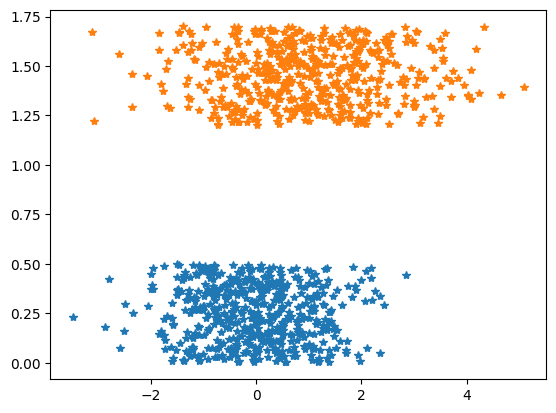

In [101]:
# Paramètres
dim = 1
num_points1, num_points2 = 500, 500
K_monte_carlo = 100
mean1 = [0]
cov1 = [[1]]

mean2 = [1]
cov2 = [[2]]



# Génération des points
points1 = generate_gaussian_points(mean1, cov1, num_points1, len(mean1))
points2 = generate_gaussian_points(mean2, cov2, num_points2, len(mean2))




# Calcul analytique
kl_analytical = kullback_leibler_analytical(np.array(mean1), np.array(cov1), np.array(mean2), np.array(cov2))
print("Divergence KL analytique :", kl_analytical)

# Monte Carlo
kl_monte_carlo = kullback_leibler_monte_carlo(points1[:K_monte_carlo], mean2, cov2)
print("Divergence KL (Monte Carlo) :", kl_monte_carlo)

# KDE
kl_kde = kullback_leibler_kde(points1, points2)
print("Divergence KL (KDE) :", kl_kde)

plt.plot(points1,[rnd.random()*.5 for _ in points1],'*')
plt.plot(points2,[1.2+rnd.random()*.5 for _ in points2],'*')

plt.show()

Divergence KL analytique : 1.5192633722990965
Divergence KL (Monte Carlo) : 1.571545969162755
Divergence KL (KDE) : 0.6359999104730303


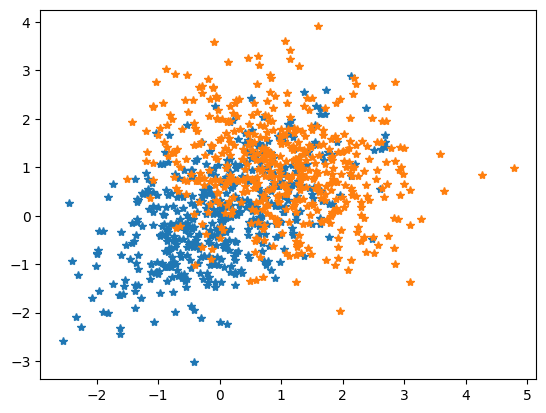

In [102]:
# Paramètres
dim = 2
num_points1, num_points2 = 500, 500
K_monte_carlo = 100
mean1 = [0, 0]
cov1 = [[1, 0.5], [0.5, 1]]

mean2 = [1, 1]
cov2 = [[1, -0.2], [-0.2, 1]]



# Génération des points
points1 = generate_gaussian_points(mean1, cov1, num_points1, len(mean1))
points2 = generate_gaussian_points(mean2, cov2, num_points2, len(mean2))


# Calcul analytique
kl_analytical = kullback_leibler_analytical(np.array(mean1), np.array(cov1), np.array(mean2), np.array(cov2))
print("Divergence KL analytique :", kl_analytical)

# Monte Carlo
kl_monte_carlo = kullback_leibler_monte_carlo(points1[:K_monte_carlo], mean2, cov2)
print("Divergence KL (Monte Carlo) :", kl_monte_carlo)

# KDE
kl_kde = kullback_leibler_kde(points1, points2)
print("Divergence KL (KDE) :", kl_kde)

plt.plot(points1[:,0],points1[:,1],'*')
plt.plot(points2[:,0],points2[:,1],'*')

plt.show()

Divergence KL analytique : 13.634627167650713
Divergence KL (Monte Carlo) : 16.425086085927745
Divergence KL (KDE) : 28.832277662225394


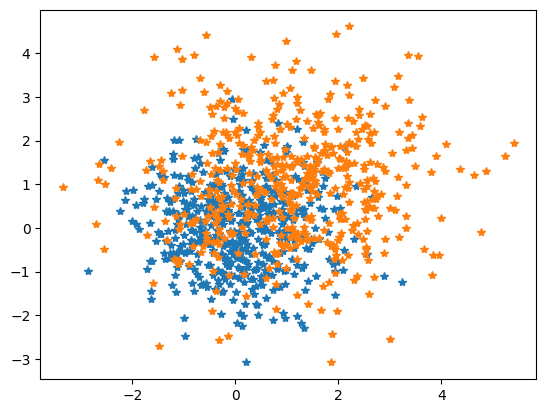

In [51]:
# Paramètres
dim = 32
num_points1, num_points2 = 500, 500
K_monte_carlo = 100

mean1 = np.zeros(dim)
cov1 = np.eye(dim)

mean2 = np.ones(dim)
mat_br = rnd.randn(dim, dim)
cov2 = 2*np.eye(dim) + .1*(mat_br + mat_br.transpose())



# Génération des points
points1 = generate_gaussian_points(mean1, cov1, num_points1, len(mean1))
points2 = generate_gaussian_points(mean2, cov2, num_points2, len(mean2))




# Calcul analytique
kl_analytical = kullback_leibler_analytical(np.array(mean1), np.array(cov1), np.array(mean2), np.array(cov2))
print("Divergence KL analytique :", kl_analytical)

# Monte Carlo
kl_monte_carlo = kullback_leibler_monte_carlo(points1[:K_monte_carlo], mean2, cov2)
print("Divergence KL (Monte Carlo) :", kl_monte_carlo)

# KDE
kl_kde = kullback_leibler_kde(points1, points2)
print("Divergence KL (KDE) :", kl_kde)

plt.plot(points1[:,0],points1[:,1],'*')
plt.plot(points2[:,0],points2[:,1],'*')

plt.show()

In [116]:
# Paramètres
dim_max = 32
num_points1, num_points2 = 100, 100
K_monte_carlo = 100
K_monte_carlo2 = 1000

true_kl = []
mc_kl = []
mc_kl2 = []
kde_kl = []


for dim in range(1,dim_max):
    mean1 = np.zeros(dim)
    cov1 = np.eye(dim)

    mean2 = np.zeros(dim)
    cov2 = np.eye(dim)

    # mean2 = 2*np.ones(dim)
    # mat_br = rnd.randn(dim, dim)
    # cov2 = np.eye(dim) + .5*(mat_br@mat_br.transpose())

    # Génération des points
    points1 = generate_gaussian_points(mean1, cov1, num_points1, len(mean1))
    points2 = generate_gaussian_points(mean2, cov2, num_points2, len(mean2))


    # Calcul analytique
    kl_analytical = kullback_leibler_analytical(np.array(mean1), np.array(cov1), np.array(mean2), np.array(cov2))
    true_kl.append(kl_analytical)


    # Monte Carlo
    kl_monte_carlo = kullback_leibler_monte_carlo(points1[:K_monte_carlo], mean2, cov2)
    mc_kl.append(kl_monte_carlo)

    kl_monte_carlo2 = kullback_leibler_monte_carlo(points1[:K_monte_carlo2], mean2, cov2)
    mc_kl2.append(kl_monte_carlo2)

    # KDE
    kl_kde = kullback_leibler_kde(points1, points2)
    kde_kl.append(kl_kde)

print('en dim : ', dim_max)
print("Divergence KL analytique :", kl_analytical)
print("Divergence KL (Monte Carlo) :", kl_monte_carlo)
print("Divergence KL (Monte Carlo) :", kl_monte_carlo2)
print("Divergence KL (KDE) :", kl_kde)



en dim :  32
Divergence KL analytique : 0.0
Divergence KL (Monte Carlo) : 3.136930501560234
Divergence KL (Monte Carlo) : 3.136930501560234
Divergence KL (KDE) : 16.037562175496838


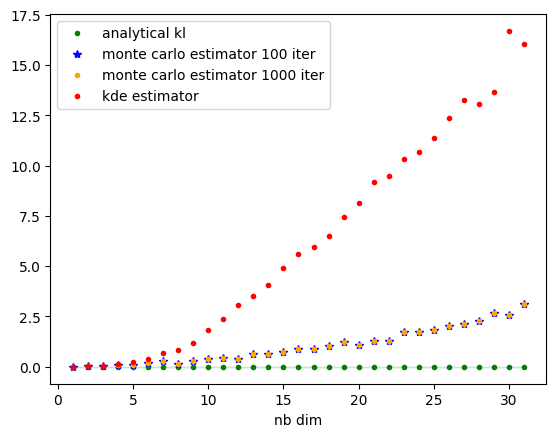

In [118]:
err = .05

plt.plot(range(1,dim_max), true_kl, '.', color = 'green', label = 'analytical kl')
plt.fill_between(range(1,dim_max), np.array(true_kl)*(1-err), np.array(true_kl)*(1+err), color='green', alpha=.2)
plt.plot(range(1,dim_max), mc_kl, '*', label = f'monte carlo estimator {K_monte_carlo} iter',  color = 'b')
plt.plot(range(1,dim_max), mc_kl2, '.', label = f'monte carlo estimator {K_monte_carlo2} iter',  color = 'orange')
plt.plot(range(1,dim_max), kde_kl, '.', label = 'kde estimator', color = 'r')
# plt.axis([20, 40, 20, 550])
plt.xlabel('nb dim')
plt.legend()

plt.show()